# Data retrieval

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
url = 'https://inshorts.com/en/read/technology'

In [3]:
news_data = []

In [4]:
news_category = url.split('/')
news_category

['https:', '', 'inshorts.com', 'en', 'read', 'technology']

In [5]:
news_category = news_category[-1]

In [6]:
news_category

'technology'

In [7]:
data = requests.get(url)
data.content

b'<!doctype html>\n<html lang="en">\n\n<head>\n  <meta charset="utf-8" />\n  <style>\n    /* The Modal (background) */\n    .modal_contact {\n        display: none; /* Hidden by default */\n        position: fixed; /* Stay in place */\n        z-index: 8; /* Sit on top */\n        left: 0;\n        top: 0;\n        width: 100%; /* Full width */\n        height: 100%;\n        overflow: auto; /* Enable scroll if needed */\n        background-color: rgb(0,0,0); /* Fallback color */\n        background-color: rgba(0,0,0,0.4); /* Black w/ opacity */\n    }\n\n    /* Modal Content/Box */\n    .modal-content {\n        background-color: #fefefe;\n        margin: 15% auto;\n        padding: 20px !important;\n        padding-top: 0 !important;\n        /* border: 1px solid #888; */\n        text-align: center;\n        position: relative;\n        border-radius: 6px;\n    }\n\n    /* The Close Button */\n    .close {\n      left: 90%;\n      color: #aaa;\n      float: right;\n      font-size: 

In [8]:
soup = BeautifulSoup(data.content, 'html.parser')

In [9]:
soup

<!DOCTYPE doctype html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
    /* The Modal (background) */
    .modal_contact {
        display: none; /* Hidden by default */
        position: fixed; /* Stay in place */
        z-index: 8; /* Sit on top */
        left: 0;
        top: 0;
        width: 100%; /* Full width */
        height: 100%;
        overflow: auto; /* Enable scroll if needed */
        background-color: rgb(0,0,0); /* Fallback color */
        background-color: rgba(0,0,0,0.4); /* Black w/ opacity */
    }

    /* Modal Content/Box */
    .modal-content {
        background-color: #fefefe;
        margin: 15% auto;
        padding: 20px !important;
        padding-top: 0 !important;
        /* border: 1px solid #888; */
        text-align: center;
        position: relative;
        border-radius: 6px;
    }

    /* The Close Button */
    .close {
      left: 90%;
      color: #aaa;
      float: right;
      font-size: 28px;
      font-weight: bold;
    /

In [10]:
news_articles = [{'news_headline': headline.find('span', attrs={'itemprop': 'headline'}).string,
                  'news_article': article.find('div', attrs={'itemprop': 'articleBody'}).string,
                  'news_category': news_category} 
                 for headline, article in zip(soup.find_all('div', 
                                                            class_ = ['news-card-title news-right-box']), 
                                              soup.find_all('div', class_=['news-card-content news-right-box']))]

In [11]:
news_data.extend(news_articles)
news_data

[{'news_headline': 'OnePlus launches new brand campaign featuring Robert Downey Jr.',
  'news_article': 'OnePlus has unveiled its latest brand campaign featuring Robert Downey Jr. Commenting on the association, Robert said, "It\'s cool to see a young brand disrupting the tech landscape...In checking out the upcoming OnePlus 7 Pro the attention to detail coupled with the innovative design was truly impressive." "Nobody could represent what we stand for better," added OnePlus founder, Pete Lau.',
  'news_category': 'technology'},
 {'news_headline': 'OnePlus 7 Pro goes on sale in India',
  'news_article': 'A few days after its official launch, OnePlus 7 Pro is available for sale at a starting price of ₹48,999 on Amazon India, OnePlus online, offline and partner stores. Buyers can avail up to ₹2,000 cashback on purchase using SBI debit and credit cards, along with benefits from Jio worth ₹9,300, and buyback value of 70% on exchange through Servify.',
  'news_category': 'technology'},
 {'ne

In [12]:
df = pd.DataFrame(news_data)

In [13]:
df = df[['news_headline', 'news_article', 'news_category']]

In [14]:
df.head(3)

,news_headline,news_article,news_category
0,OnePlus launches new brand campaign featuring ...,OnePlus has unveiled its latest brand campaign...,technology
1,OnePlus 7 Pro goes on sale in India,"A few days after its official launch, OnePlus ...",technology
2,Microsoft unveils world's first whisky develop...,Microsoft has unveiled world's first whisky de...,technology


# Prepare user defined function to extract data from inshorts.com

In [15]:
urls_list = ['https://inshorts.com/en/read/technology',
             'https://inshorts.com/en/read/sports',
             'https://inshorts.com/en/read/world']

In [16]:
def datasetPrepare(urls_list):
    news_data = []
    for url in urls_list:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        news_articles = [{'news_headline': headline.find('span', attrs={"itemprop": "headline"}).string,
                          'news_article': article.find('div', attrs={"itemprop": "articleBody"}).string,
                          'news_category': news_category}
                         
                            for headline, article in 
                             zip(soup.find_all('div', class_=["news-card-title news-right-box"]),
                                 soup.find_all('div', class_=["news-card-content news-right-box"]))
                        ]
        news_data.extend(news_articles) 
    df =  pd.DataFrame(news_data)
    df = df[['news_headline', 'news_article', 'news_category']]
    return df    

In [17]:
news_df = datasetPrepare(urls_list)

In [18]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 3 columns):
news_headline    74 non-null object
news_article     74 non-null object
news_category    74 non-null object
dtypes: object(3)
memory usage: 1.8+ KB


In [19]:
news_df.head(5)

,news_headline,news_article,news_category
0,OnePlus launches new brand campaign featuring ...,OnePlus has unveiled its latest brand campaign...,technology
1,OnePlus 7 Pro goes on sale in India,"A few days after its official launch, OnePlus ...",technology
2,Microsoft unveils world's first whisky develop...,Microsoft has unveiled world's first whisky de...,technology
3,"₹1,000 tech bypasses rules, sends 1L WhatsApp ...","Indian digital marketers are using ₹1,000 soft...",technology
4,EC orders Twitter to remove all tweets on Lok ...,Ahead of the last phase of the 2019 Lok Sabha ...,technology


In [20]:
news_df.news_category.value_counts()

technology    25
sports        25
world         24
Name: news_category, dtype: int64

# Text Wrangling and Pre-processing

In [25]:
! pip install spacy

  Using cached https://files.pythonhosted.org/packages/83/26/b829c281ea584cd1d3889e40b57527782b748cbd91e753796506210f8bb4/spacy-2.1.4-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/84/0e/35f8ce00fc3412aa3a888a3d8e040c4c65ccbad8310aa2981d3e6f379867/blis-0.2.4-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/12/b0/2c6c0f0edd87a3a4ac039bec792a61603233901a6df53e976d746eb86d04/thinc-7.0.4-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/45/af/685bf3ce889ea191f3b916557f5677cc95a5e87b2fa120d74b5dd6d049d0/tqdm-4.32.1-py2.py3-none-any.whl


You are using pip version 19.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [36]:
!python -m spacy.en.download

C:\Users\gopin\Anaconda3\python.exe: Error while finding module specification for 'spacy.en.download' (ModuleNotFoundError: No module named 'spacy.en')


In [26]:
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata

In [32]:
from contractions import contractions_dict

In [30]:
!pip install contractions

You are using pip version 19.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [28]:
!pip install pycontractions

  Running setup.py bdist_wheel for pycontractions: started
  Running setup.py bdist_wheel for pycontractions: finished with status 'done'
  Stored in directory: C:\Users\gopin\AppData\Local\pip\Cache\wheels\52\5c\7d\8c9b47574380b68f7efdd637657f135ca143ea0ba4ade3b296
  Running setup.py bdist_wheel for gensim: started
  Running setup.py bdist_wheel for gensim: finished with status 'done'
  Stored in directory: C:\Users\gopin\AppData\Local\pip\Cache\wheels\73\6b\89\bb14fd56b74774a39a771a12f525a6a14c2c2692d3084ad048
  Running setup.py bdist_wheel for language-check: started
  Running setup.py bdist_wheel for language-check: finished with status 'done'
  Stored in directory: C:\Users\gopin\AppData\Local\pip\Cache\wheels\d5\46\82\90a89c23eac1837364ed7217a9eed71bc9e6ad4825be93968e
  Running setup.py bdist_wheel for pyemd: started
  Running setup.py bdist_wheel for pyemd: finished with status 'error'
  Complete output from command C:\Users\gopin\Anaconda3\python.exe -u -c "import setuptools, t

  Failed building wheel for pyemd
Command "C:\Users\gopin\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\gopin\\AppData\\Local\\Temp\\pip-install-llr6n8me\\pyemd\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\gopin\AppData\Local\Temp\pip-record-czaquw7j\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\gopin\AppData\Local\Temp\pip-install-llr6n8me\pyemd\
You are using pip version 19.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [37]:
nlp = spacy.load('en')

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [38]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

## Remove HTML tags

In [39]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>Some important text</h2></html>')

'Some important text'

## Remove accented characters

In [40]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

## Expand contractions

In [41]:
def expand_contractions(text, contraction_mapping=contractions_dict):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [42]:
expand_contractions("Y'all can't expand contractions I'd think")

'You all cannot expand contractions I would think'

## Remove special characters

In [43]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [44]:
remove_special_characters("Well this was fun! What do you think? 123#@!", remove_digits=True)

'Well this was fun What do you think '

## Text lemmatization

In [45]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [46]:
lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'My system keep crash ! his crashed yesterday , ours crash daily'

## Text stemming

In [47]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'My system keep crash hi crash yesterday, our crash daili'

## Remove stopwords

In [48]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer not'

## Building a text normalizer

In [49]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

## Pre-process and normalize news articles

In [50]:
news_df['full_text'] = news_df["news_headline"].map(str)+ '. ' + news_df["news_article"]

In [51]:
news_df['clean_text'] = normalize_corpus(news_df['full_text'])
norm_corpus = list(news_df['clean_text'])
news_df.iloc[1][['full_text', 'clean_text']].to_dict()

{'full_text': 'OnePlus 7 Pro goes on sale in India. A few days after its official launch, OnePlus 7 Pro is available for sale at a starting price of ₹48,999 on Amazon India, OnePlus online, offline and partner stores. Buyers can avail up to ₹2,000 cashback on purchase using SBI debit and credit cards, along with benefits from Jio worth ₹9,300, and buyback value of 70% on exchange through Servify.',
 'clean_text': 'oneplus pro go sale india day official launch oneplus pro available sale start price amazon india oneplus online offline partner store buyer avail cashback purchase use sbi debit credit card along benefit jio worth buyback value exchange servify'}

# Save the news articles

In [52]:
news_df.to_csv('news.csv', index=False, encoding='utf-8')

# Tagging Parts of Speech

In [53]:
news_df = pd.read_csv('news.csv')

In [54]:
corpus = normalize_corpus(news_df['full_text'], text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)

sentence = str(news_df.iloc[1].news_headline)
sentence_nlp = nlp(sentence)

In [55]:
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])

,Word,POS tag,Tag type
0,OnePlus,NN,NOUN
1,7,CD,NUM
2,Pro,NNP,PROPN
3,goes,VBZ,VERB
4,on,IN,ADP
5,sale,NN,NOUN
6,in,IN,ADP
7,India,NNP,PROPN


In [56]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gopin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [57]:
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\gopin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\maxent_treebank_pos_tagger.zip.


True

In [58]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gopin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [59]:
nltk_pos_tagged = nltk.pos_tag(sentence.split())

In [60]:
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])

,Word,POS tag
0,OnePlus,CC
1,7,CD
2,Pro,NNP
3,goes,VBZ
4,on,IN
5,sale,NN
6,in,IN
7,India,NNP


# Shallow Parsing or Chunking Text

In [61]:
nltk.download('conll2000')

[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\gopin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.


True

In [62]:
from nltk.corpus import conll2000
data = conll2000.chunked_sents()

In [63]:
train_data = data[:10900]
test_data = data[10900:] 
print(len(train_data), len(test_data))
print(train_data[1]) 

10900 48
(S
  Chancellor/NNP
  (PP of/IN)
  (NP the/DT Exchequer/NNP)
  (NP Nigel/NNP Lawson/NNP)
  (NP 's/POS restated/VBN commitment/NN)
  (PP to/TO)
  (NP a/DT firm/NN monetary/JJ policy/NN)
  (VP has/VBZ helped/VBN to/TO prevent/VB)
  (NP a/DT freefall/NN)
  (PP in/IN)
  (NP sterling/NN)
  (PP over/IN)
  (NP the/DT past/JJ week/NN)
  ./.)


# Named Entity Recognition

In [64]:
sentence = str(news_df.iloc[1].full_text)

In [65]:
sentence_nlp = nlp(sentence)

In [66]:
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

[(7, 'CARDINAL'), (India, 'GPE'), (A, 'DATE'), (few, 'DATE'), (days, 'DATE'), (7, 'CARDINAL'), (₹48,999, 'GPE'), (Amazon, 'GPE'), (India, 'GPE'), (SBI, 'ORG'), (Jio, 'PERSON'), (₹9,300, 'CARDINAL'), (70, 'PERCENT'), (%, 'PERCENT'), (Servify, 'ORG')]


In [67]:
from spacy import displacy
displacy.render(sentence_nlp, style='ent', jupyter=True)

In [68]:
named_entities = []
for sentence in corpus:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])

In [69]:
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Name,US,India,China,Indian,WhatsApp,Amazon,first,Chinese,Wikipedia,England,Australian,Apple,Microsoft,five,IPL
Entity Type,GPE,GPE,GPE,NORP,ORG,ORG,ORDINAL,NORP,GPE,GPE,NORP,ORG,ORG,CARDINAL,ORG
Frequency,24,14,13,10,9,8,7,7,6,6,6,5,5,5,4


In [70]:
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Type,PERSON,ORG,GPE,CARDINAL,DATE,NORP,ORDINAL,MONEY,PRODUCT,EVENT,LOC,PERCENT,QUANTITY,FAC,TIME
Frequency,138,127,127,101,66,52,17,16,9,9,6,5,4,3,2


## Emotion and Sentiment Analysis

In [72]:
!pip install afinn

  Running setup.py bdist_wheel for afinn: started
  Running setup.py bdist_wheel for afinn: finished with status 'done'
  Stored in directory: C:\Users\gopin\AppData\Local\pip\Cache\wheels\b5\1c\de\428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn


You are using pip version 19.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [73]:
from afinn import Afinn

In [74]:
!python -m pip install --upgrade pip

  Found existing installation: pip 19.1
    Uninstalling pip-19.1:
      Successfully uninstalled pip-19.1


In [75]:
af = Afinn()

In [76]:
sentiment_scores = [af.score(article) for article in corpus]

In [77]:
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [78]:
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores, sentiment_category]).T

In [79]:
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']

In [80]:
df['sentiment_score'] = df.sentiment_score.astype('float')

In [81]:
df.groupby(by=['news_category']).describe()

sentiment_score                                                 
                        count      mean       std   min   25%  50%   75%   max
news_category                                                                 
sports                   25.0  1.880000  8.038035 -11.0 -3.00  0.0  10.0  18.0
technology               25.0 -1.240000  5.889822 -16.0 -4.00  0.0   3.0   8.0
world                    24.0 -5.083333  5.897064 -16.0 -9.25 -6.0  -1.0   6.0

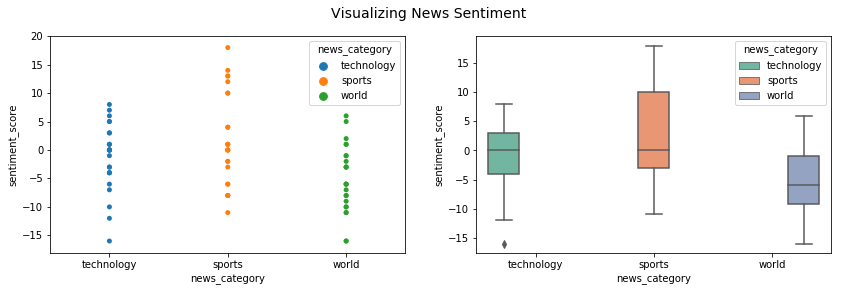

In [82]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='news_category', y="sentiment_score",  hue='news_category', data=df, ax=ax1)
bp = sns.boxplot(x='news_category', y="sentiment_score", hue='news_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

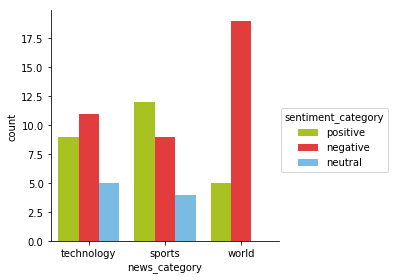

In [83]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [89]:
df

,news_category,sentiment_score,sentiment_category
0,technology,6.0,positive
1,technology,3.0,positive
2,technology,7.0,positive
3,technology,-3.0,negative
4,technology,1.0,positive
5,technology,-6.0,negative
6,technology,0.0,neutral
7,technology,-12.0,negative
8,technology,-7.0,negative
9,technology,-1.0,negative


In [90]:
pos_idx = df[(df.news_category=='technology') & (df.sentiment_score == 5)].index[0]

In [91]:
neg_idx = df[(df.news_category=='technology') & (df.sentiment_score == -1)].index[0]

In [92]:
print('Most Negative Tech News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive Tech News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative Tech News Article: Facebook is the highest stipend paying company to interns in the US in 2019, with a median monthly pay of $8,000 (₹5.6 lakh), Glassdoor survey has found. Facebook is followed by Amazon and Salesforce, with median monthly pays of $7,725 (₹5.41 lakh) and $7,667 (₹5.37 lakh) respectively. Google is fourth-highest stipend paying company in the US at $7,500 (₹5.25 lakh).

Most Positive Tech News Article: Munich-based startup Lilium unveiled what it claims is the world's first all-electric, jet-powered, five-seater air taxi prototype after successfully completing the full-scale prototype's maiden test earlier this month. The air taxi will have a 300 km range with a top speed of 300 kmph. Lilium intends to be operational in cities globally by 2025, providing an app-based air taxi service.


In [94]:
pos_idx = df[(df.news_category=='world') & (df.sentiment_score == 5)].index[0]
neg_idx = df[(df.news_category=='world') & (df.sentiment_score == -2)].index[0]

print('Most Negative World News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive World News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative World News Article: An F-16 fighter jet being flown in routine training exercises crashed into a commercial building just outside March Air Reserve Base in US' California on Thursday. The pilot ejected from the jet safely and no injuries were reported in the incident. The incident's video shows a big hole in the roof of the building because of the aircraft crash.

Most Positive World News Article: Tariffs on the iPhone's China-made batteries and other components would increase its manufacturing cost by 2% to 3%, a report said, adding Apple would need to increase iPhone prices by a similar amount to make the same profit. The US raised tariffs on $200 billion worth of Chinese products and China retaliated with tariffs on $60 billion of US goods.


In [96]:
! pip install textblob

In [97]:
from textblob import TextBlob

In [98]:
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in news_df['clean_text']]

In [99]:
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [100]:
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                                  \
                        count     mean       std   min      25%    50%    75%   
news_category                                                                   
sports                   25.0  0.05624  0.158251 -0.34 -0.02900  0.025  0.163   
technology               25.0  0.02180  0.174249 -0.30 -0.06700  0.000  0.097   
world                    24.0  0.02700  0.180832 -0.30 -0.12125  0.039  0.152   

                      
                 max  
news_category         
sports         0.434  
technology     0.400  
world          0.367

In [101]:
df.head()

,news_category,sentiment_score,sentiment_category
0,technology,0.298,positive
1,technology,0.350,positive
2,technology,-0.054,negative
3,technology,-0.221,negative
4,technology,0.000,neutral


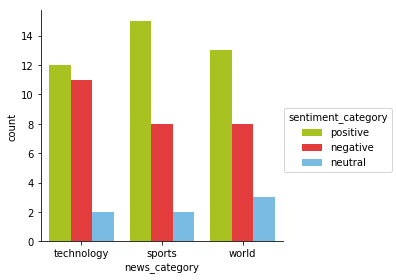

In [102]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [103]:
pos_idx = df[(df.news_category=='world') & (df.sentiment_score > 0.)].index[0]
neg_idx = df[(df.news_category=='world') & (df.sentiment_score < -0.)].index[0]

print('Most Negative World News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive World News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative World News Article: A 28-year-old Indian citizen has been jailed for 29 months after he pleaded guilty of stalking a woman over a period of 18 months in UK. The convict, Rohit Sharma, met the woman in 2017 when she served in a shop in London and asked her to marry him the same day. Sharma used to call her 40 times daily.

Most Positive World News Article: Police in Chicago have charged three people in connection with the murder of a pregnant teenager whose unborn baby was cut out of her womb after her death. Police said 19-year-old Marlen Ochoa-Lopez was lured to the home of someone she knew in April with the promise of free baby supplies. Ochoa-Lopez's body was found in garbage earlier this week.


In [105]:
! pip install model_evaluation_utils

  ERROR: Could not find a version that satisfies the requirement model_evaluation_utils (from versions: none)
ERROR: No matching distribution found for model_evaluation_utils


In [108]:
import model_evaluation_utils as meu
meu.display_confusion_matrix(true_labels=sentiment_category, 
                                    predicted_labels=sentiment_category_tb, 
                                    classes=['negative', 'neutral', 'positive'])

                 Predicted:                 
                   negative neutral positive
Actual: negative         20       4       15
        neutral           4       0        5
        positive          3       3       20


In [109]:
!pip install sklearn-evaluation

  Stored in directory: C:\Users\gopin\AppData\Local\pip\Cache\wheels\a8\38\0d\9103d63a0189c6e3b4ecc6f03e40c1b6762b1ff55612a7313c
  Stored in directory: C:\Users\gopin\AppData\Local\pip\Cache\wheels\2b\67\89\414471314a2d15de625d184d8be6d38a03ae1e983dbda91e84
Successfully built sklearn-evaluation tabulate
